In [211]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)


In [40]:
from pandas.tools.plotting import scatter_matrix

In [213]:
train = pd.read_csv("fhl_training.csv")

In [214]:
train.head(5)

,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,...,Amount,Front,Back,BoCreditScore,CoCreditScore,PMI,Self,BoEth,CoEth,AcqTyp
0,2024921,Des Moines,19,27,16140,9999999999,9601.00,1.55,63173,56767,...,105000,0.1600,0.1800,2,2,0.0,2,2,2,1
1,2008844,Cincinnati,39,61,17140,1086201,250.02,5.35,87417,67016,...,108200,0.1100,0.2500,5,5,0.0,2,2,2,4
2,2046768,Des Moines,19,153,19780,462839,110.27,14.29,91250,71705,...,181501,0.1455,0.3142,5,5,0.0,2,2,2,1
3,2018615,Indianapolis,18,109,26900,2395032,5102.02,2.79,62742,64663,...,217600,0.2400,0.4300,3,9,0.0,2,2,5,1
4,2025487,Des Moines,46,99,43620,9999999999,103.00,3.20,71125,66496,...,181200,0.2421,0.3724,5,9,0.0,2,2,5,1


In [5]:
train.shape

(4000, 42)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 42 columns):
AssignedID        4000 non-null int64
FHLBank           4000 non-null object
FIPSStateCode     4000 non-null int64
FIPSCountyCode    4000 non-null int64
MSA               4000 non-null int64
FeatureID         4000 non-null int64
Tract             4000 non-null float64
MinPer            4000 non-null float64
TraMedY           4000 non-null int64
LocMedY           4000 non-null int64
Tractrat          4000 non-null float64
Income            4000 non-null int64
CurAreY           4000 non-null int64
IncRat            4000 non-null float64
UPB               4000 non-null int64
LTV               4000 non-null float64
MortDate          4000 non-null int64
AcqDate           4000 non-null int64
Purpose           4000 non-null int64
FedGuar           4000 non-null int64
Term              4000 non-null int64
NumBor            4000 non-null int64
First             4000 non-null int64
BoRace  

### Modeling Process

### 1. Screen out variable that can be excluded before regression analysis

AssignedID, StateCode, CountyCode, MSA, FeaturedID, Tract are removed because they cannot be used in the regression   model (id, code, or too many categories)
AcqDate is composed of only one year 2016, so excluded from the regression
UPB and Amount have correlation of exactly 1, but I didn’t exclude any of them in order
to observe how regression model will change depending on their inclusion.

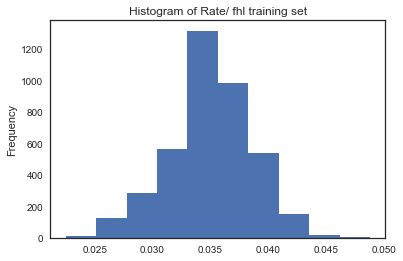

In [6]:
train.Rate.plot(kind = "hist", use_index = 'True', title = 'Histogram of Rate/ fhl training set')

In [365]:
mean = np.mean(train.Rate)

In [9]:
std = np.std(train.Rate)


### 2. Observe each variable to find out whether they are numeric variables or categorical variables.

• BankName, MortDate, Purpose FedGuar, First, Borace, Corace, BoGender, CoGender, Occup, Geog, BoCreditScore, CoCreditScore, BoEth, CoEth, AcqTyp are categorical variables.

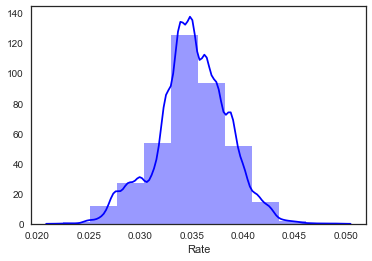

In [10]:
sns.distplot(train.Rate, bins = 10, hist = True, color = 'Blue')

In [11]:
stats.ttest_1samp(a= train.Rate,  popmean= mean)

Ttest_1sampResult(statistic=1.1923980148556757e-11, pvalue=0.99999999999048661)

In [155]:
train.FHLBank = pd.factorize(train.FHLBank)[0]
train.FedGuar = pd.factorize(train.FedGuar)[0]
train.Term = pd.factorize(train.Term)[0]
train['FIPSStateCode'] = train['FIPSStateCode'].astype('category')
train['FIPSCountyCode'] = train['FIPSCountyCode'].astype('category')
train['Purpose'] = train['Purpose'].astype('category')
train['FedGuar'] = train['FedGuar'].astype('category')
train['Term'] = train['Term'].astype('category')
train['First'] = train['First'].astype('category')
train['BoRace'] = train['BoRace'].astype('category')
train['CoRace'] = train['CoRace'].astype('category')
train['BoGender'] = train['BoGender'].astype('category')
train['BoEth'] = train['BoEth'].astype('category')

### Screening Out useless Variables

In [48]:
train.corr()

,AssignedID,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,Tractrat,Income,CurAreY,...,CoGender,BoAge,CoAge,Rate,Amount,Front,Back,BoCreditScore,CoCreditScore,PMI
AssignedID,1.000000,0.061424,-0.095751,0.021520,0.031481,-0.057040,-0.106211,-0.009274,-0.006718,-0.124293,...,0.001308,0.113244,0.049802,-0.397579,-0.003692,-0.033760,-0.037296,0.019977,0.002291,-0.057961
MSA,0.061424,1.000000,0.146424,0.380156,-0.085676,-0.276251,-0.301949,-0.171532,-0.030889,-0.296189,...,-0.028970,0.009619,-0.026518,-0.059307,-0.154044,-0.107371,-0.013500,-0.094649,-0.059192,-0.010092
FeatureID,-0.095751,0.146424,1.000000,0.081758,-0.061858,-0.022689,0.000890,-0.018884,-0.014731,-0.001170,...,-0.040364,-0.025825,-0.053354,-0.007575,-0.029933,0.022409,0.048853,-0.064923,-0.051184,-0.004003
Tract,0.021520,0.380156,0.081758,1.000000,-0.112505,-0.197647,-0.205335,-0.130253,-0.032829,-0.192263,...,-0.022189,0.023547,-0.012032,-0.042361,-0.109554,-0.053140,0.003191,-0.041851,-0.042486,-0.049549
MinPer,0.031481,-0.085676,-0.061858,-0.112505,1.000000,0.034336,0.282138,-0.096498,0.009159,0.266822,...,0.088487,-0.011510,0.074660,0.090500,0.246051,0.205855,0.095208,-0.051714,0.088571,0.015398
TraMedY,-0.057040,-0.276251,-0.022689,-0.197647,0.034336,1.000000,0.530900,0.846342,0.100137,0.522722,...,-0.059494,0.016049,-0.057614,0.008142,0.522339,0.140492,0.000888,0.106837,-0.044625,-0.080063
LocMedY,-0.106211,-0.301949,0.000890,-0.205335,0.282138,0.530900,1.000000,0.068819,0.069969,0.990516,...,0.001055,-0.019577,-0.004823,0.052410,0.475937,0.219560,0.083377,0.040194,0.018713,-0.046095
Tractrat,-0.009274,-0.171532,-0.018884,-0.130253,-0.096498,0.846342,0.068819,1.000000,0.074661,0.061343,...,-0.068959,0.014670,-0.072924,-0.024157,0.339734,0.052157,-0.038997,0.104800,-0.062564,-0.071814
Income,-0.006718,-0.030889,-0.014731,-0.032829,0.009159,0.100137,0.069969,0.074661,1.000000,0.071630,...,-0.076712,0.008721,-0.078898,-0.057301,0.169683,-0.176662,-0.160252,0.046825,-0.079402,-0.035258
CurAreY,-0.124293,-0.296189,-0.001170,-0.192263,0.266822,0.522722,0.990516,0.061343,0.071630,1.000000,...,-0.002666,-0.014109,-0.004370,0.057038,0.467296,0.215269,0.080180,0.039649,0.015878,-0.046442


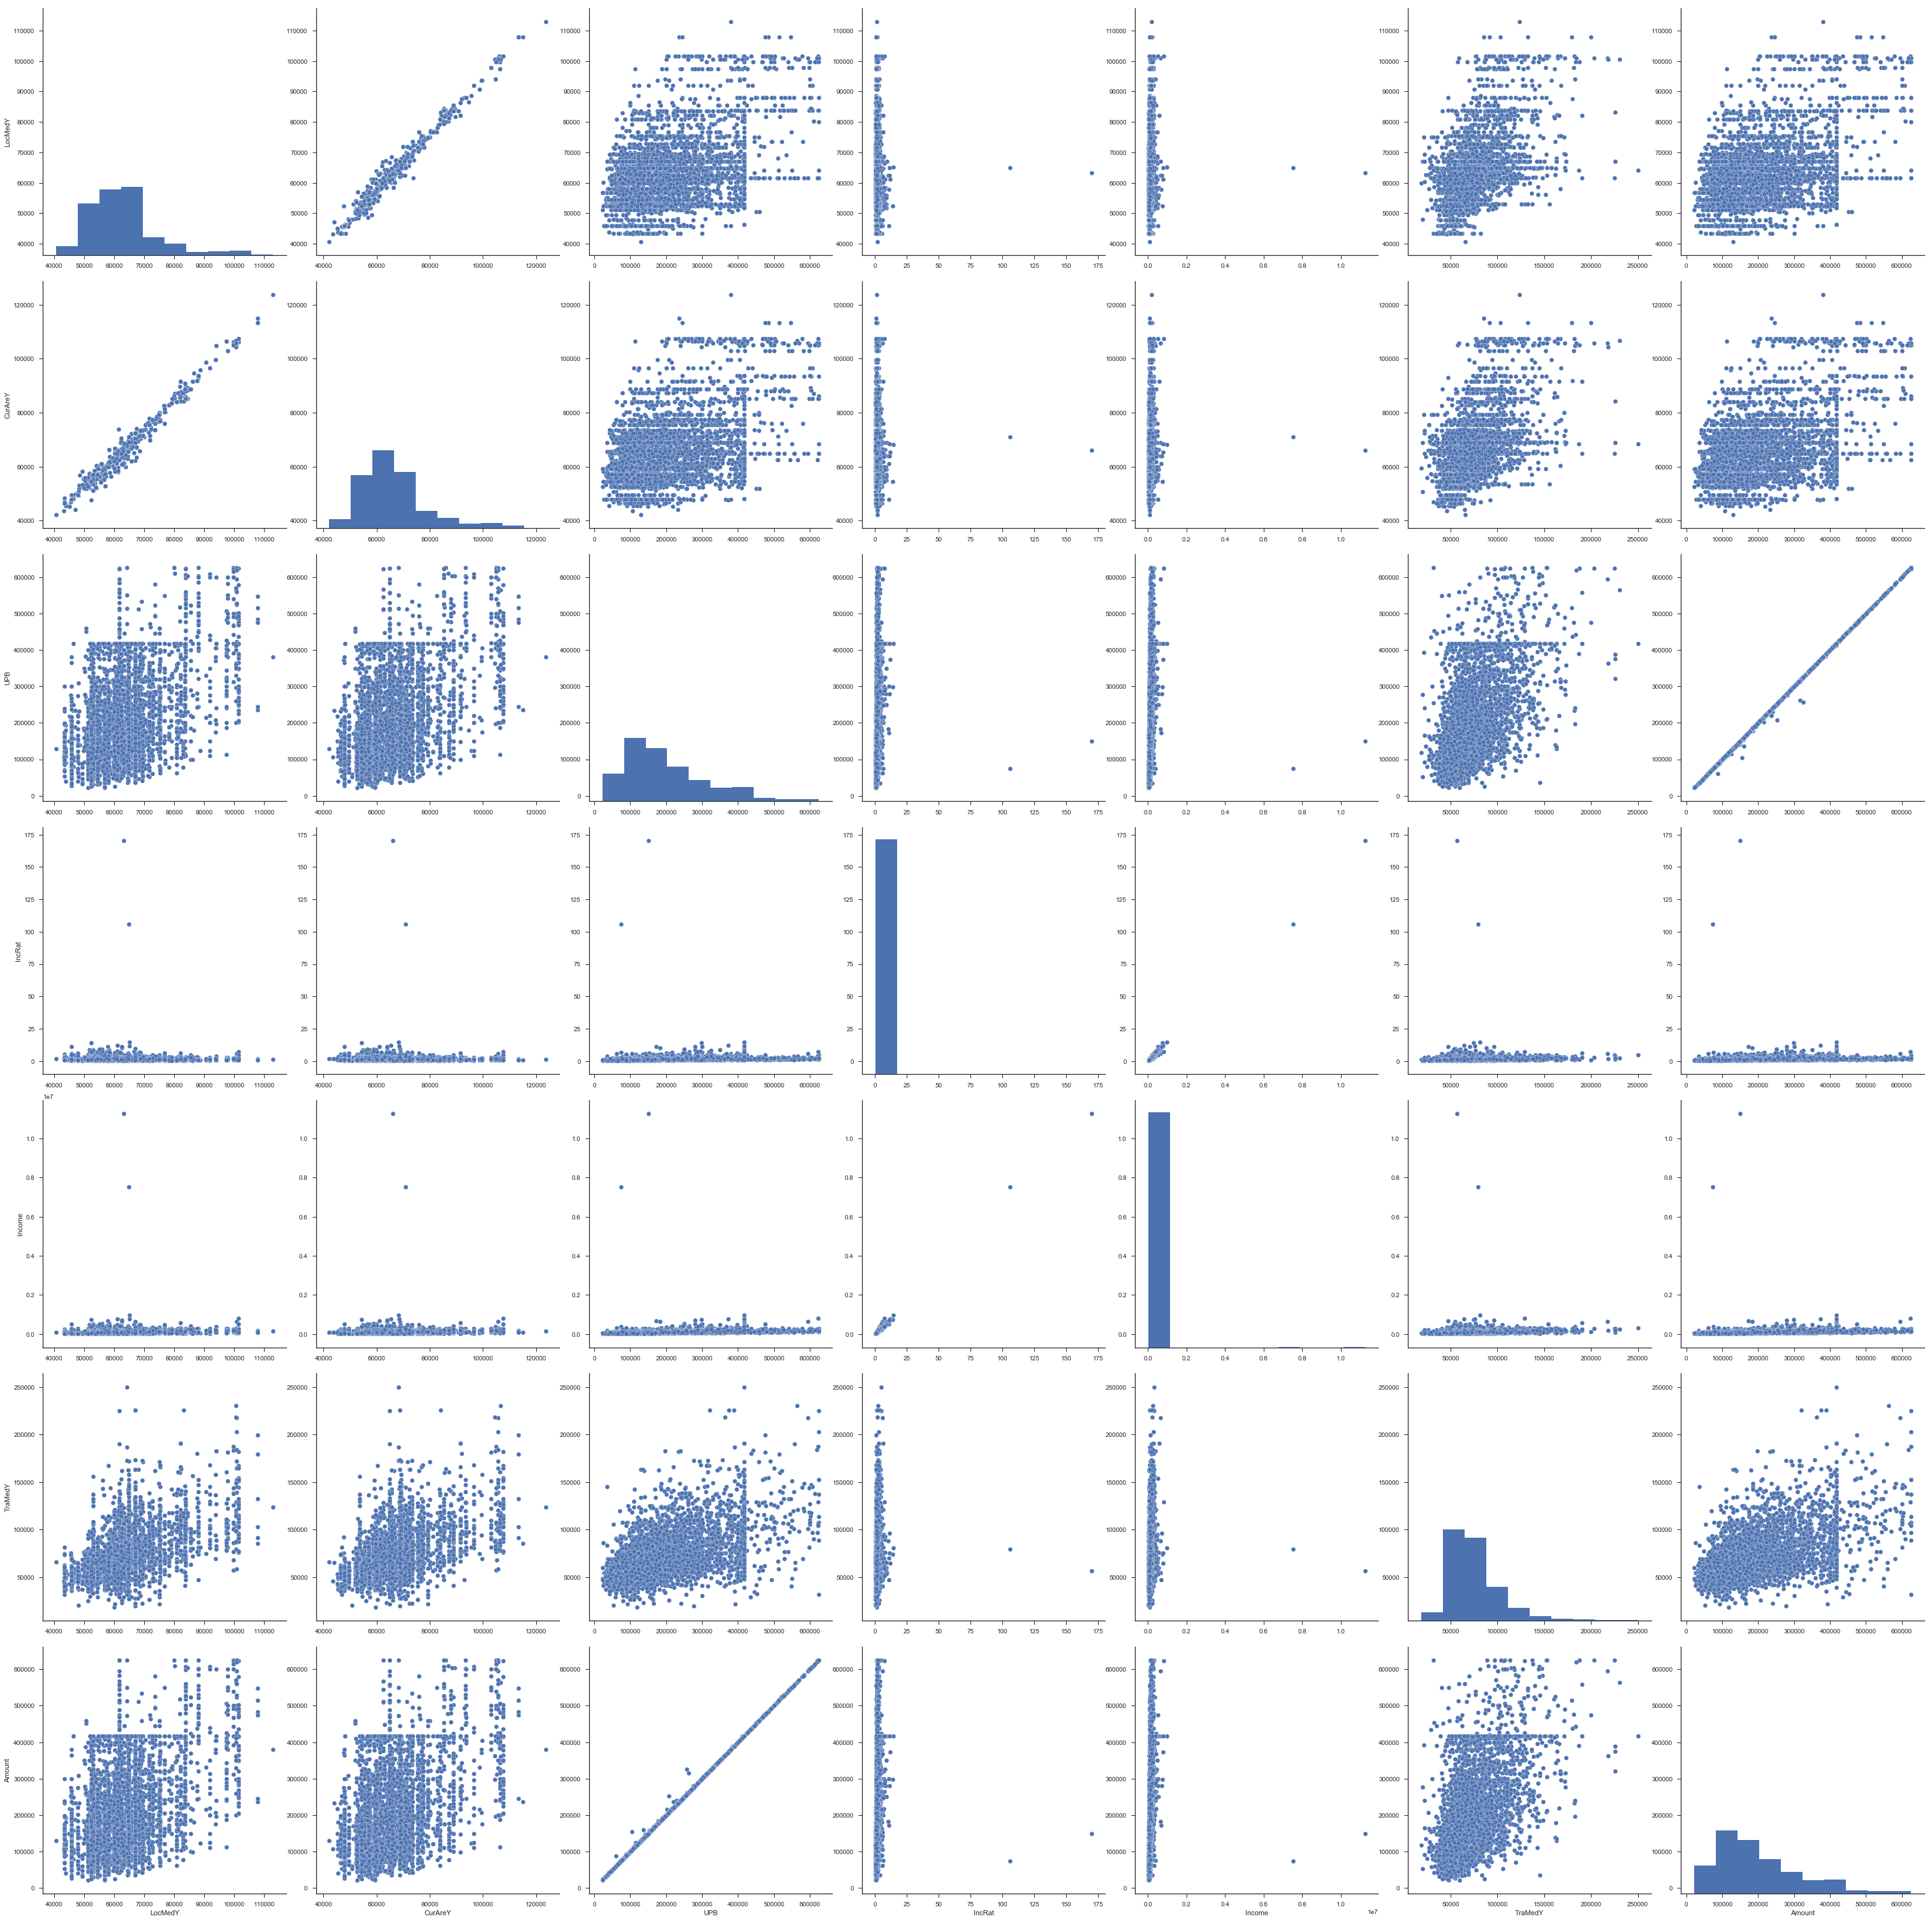

In [244]:
g = sns.pairplot(train[['LocMedY', 'CurAreY','UPB','IncRat','Income','TraMedY', 
                       'Amount']] , palette="husl",
                        diag_kind="hist" , size=6)

## Multicollinearity:

There is actually strong multicollinearity between UPB and Amount. The correlation between them is almost 1. It could be right thing to remove one of those variable because the exclusion does not harm the R-square value that much, which was about 0.6%. But, because normally the amount of unpaid principal balance could affect the actual interest rate in real world and I don’t like to decrease the R-square value anymore, I included both variable, one with log transformation.

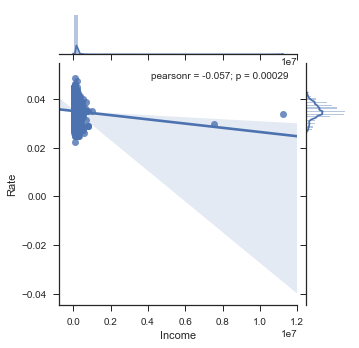

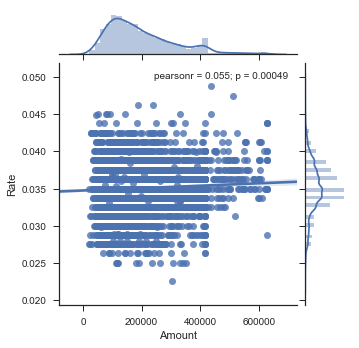

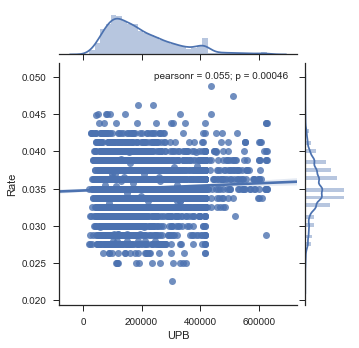

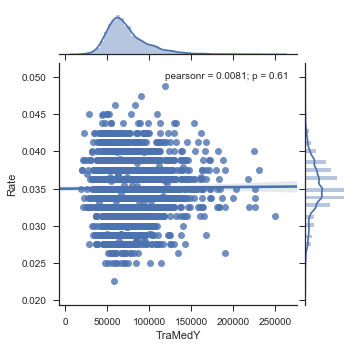

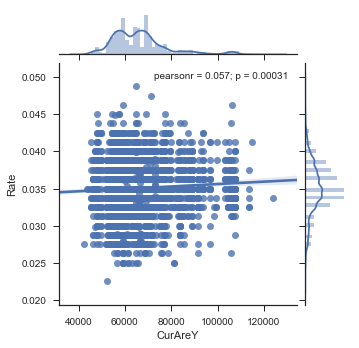

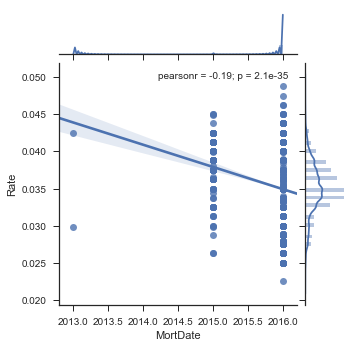

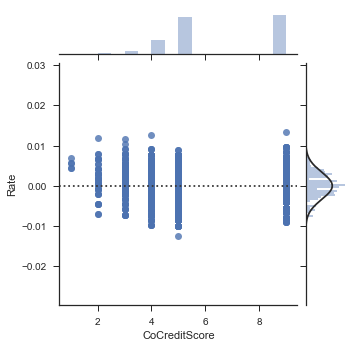

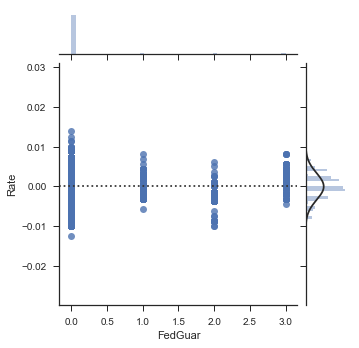

In [256]:
sns.jointplot(x="Income", y="Rate", data= train, kind = 'reg', size = 5)
sns.jointplot(x="Amount", y="Rate", data= train, kind = 'reg', size = 5)
sns.jointplot(x="UPB", y="Rate", data= train, kind = 'reg', size = 5)
sns.jointplot(x="TraMedY", y="Rate", data= train, kind = 'reg', size = 5)
sns.jointplot(x="CurAreY", y="Rate", data= train, kind = 'reg', size = 5)
sns.jointplot(x="MortDate", y="Rate", data= train, kind = 'reg', size = 5)
sns.jointplot(x="CoCreditScore", y="Rate", data= train, kind = 'resid', size = 5)
sns.jointplot(x="FedGuar", y="Rate", data= train, kind = 'resid', size = 5)
#sns.jointplot(x="FHLBank", y="Rate", data= train, kind = 'resid' , size = 5)
plt.show()

(array([    2.,     7.,    10.,    19.,    14.,    26.,    41.,    35.,
           41.,    46.,    68.,    66.,   116.,   106.,   145.,   143.,
          174.,   296.,   288.,   260.,  1188.,    39.,    91.,   234.,
           64.,   276.,   127.,    67.,     9.,     2.]),
 array([ 0.15      ,  0.18166667,  0.21333333,  0.245     ,  0.27666667,
         0.30833333,  0.34      ,  0.37166667,  0.40333333,  0.435     ,
         0.46666667,  0.49833333,  0.53      ,  0.56166667,  0.59333333,
         0.625     ,  0.65666667,  0.68833333,  0.72      ,  0.75166667,
         0.78333333,  0.815     ,  0.84666667,  0.87833333,  0.91      ,
         0.94166667,  0.97333333,  1.005     ,  1.03666667,  1.06833333,
         1.1       ]),
 <a list of 30 Patch objects>)

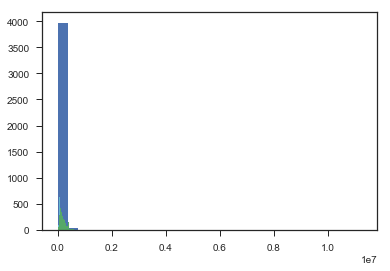

In [366]:
plt.hist(train.Income, bins = 30)
plt.hist(train.MinPer, bins = 30)
plt.hist(train.LocMedY, bins = 30)
plt.hist(train.IncRat, bins = 25)
plt.hist(train.TraMedY, bins = 30)
plt.hist(train.TraMedY, bins = 30)
plt.hist(train.CurAreY, bins = 30)
plt.hist(train.UPB, bins = 30)
plt.hist(train.LTV, bins = 30)

### 3. Produce regression models with many possibilities : removing outliers, transformation of variables, and creating interactions between variables.

Histogram of MinPer, LocMedY, Income, and IncRat shows the data are concentrated to one side. I transformed these variables with natural logarithms and produced regression models (Stepwise, Forward, Backward) in each case.
Scatter plot of Income and Rate shows two outliers that can affect the regression results. I compared the regression models when having these outliers and when not having them. However, there was not critical difference, so I included the outliers in the model.
I also created several new columns with the many combination of Income, BoCreditRate, CoCreditScore, IncRat, Term, Amount, MinPer, LocMedY by Interaction method.

I finally found out that Log form of Rate can boost the R-square value by about 3% with almost any combination of independent variables that have more than 40% R-square value. So, later this point, I used log form of Rate as dependent variable.

### 4. Backward Elimination through p-value and adjusted R2 

Start with the full model with 18 variables above that had R-square value of 0.5176 and 0.5126

Drop the variable with the highest p-value and refit a smaller model until all variables left in the model are significant
From the first regression model with all the variables, I dropped 8 variables one by one and finally got 8 variables of BankName, UPB, LTV, MortDate, FedGuar, Term, BoCreditScore, Log(LocMedY), Log(Amount)With those 8 variables, I got R-square of 0.5080 and adj R-square of 0.505.
The reason I removed CoCredityScore is that only from the first category (credit < 620) it
showed significant p-value. I know that it is better sometimes to include the categorical variable in a model if at least one element of the category shows significant p-value, however, the number of first category (credit < 620) is only 2 cases. Also, this variable includes too many missing values, 1636 cases. So, it is better to remove it from the model even if the inclusion produces slightly higher adjusted R2 value.
Also, I dropped the log(Income). It first looked reasonable to include log(Income) variable in the model, but actually Income level is more used for deciding the amount of mortgage not directly for deciding the mortgage interest rate. (correlation between the Income and Amount is 0.563 and there is some level of collinearity)

## Multiple Linear regression

In [295]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [86]:
#x = train.loc[:,['Purpose', 'FedGuar', 'Term', 'First','BoRace','CoRace','BoGender','CoGender','Occup',             
#'Geog','Self','BoEth', 'CoEth','AcqTyp', 'Tract','MinPer','TraMedY','LocMedY','Tractrat','Income','CurAreY','IncRat',            
#'UPB','LTV','MortDate','AcqDate','BoAge','CoAge','Amount','Front','Back','BoCreditScore','CoCreditScore','PMI']].values
#y = train["Rate"].values

In [297]:
x = train.loc[:,['FHLBank','Income','LocMedY','FedGuar','LTV','UPB','MortDate','BoCreditScore','Term']].values
y = train.loc[:,['Rate']].values

In [291]:
mod = smf.ols(formula ="np.log(y) ~ np.log(Income) + np.log(LTV) + C(FHLBank) + np.log(LocMedY) + C(FedGuar) + LTV  + np.log(UPB) + C(MortDate) + C(BoCreditScore) + Term", data=train)

In [292]:
reg = mod.fit()
reg

In [293]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sun, 05 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:53:11   Log-Likelihood:                 5010.6
No. Observations:                4000   AIC:                            -9967.
Df Residuals:                    3973   BIC:                            -9797.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.3631      0.117    -28.780      0.000      -3.592      -3.134
C(FHLBank)[T.Boston]            0.0490      0.016      3.086      0.002       0.018       0.080
C(FHLBank)[T.Chicago]           0.0414      0.015      2.739      0.006       0.012       0.071
C(FHLBank)[T.Cincinnati]        0.0174      0.015      1.134      0.257      -0.013       0.048
C(FHLBank)[T.Dallas]            0.0635      0.025      2.587      0.010       0.015       0.112
C(FHLBank)[T.Des Moines]        0.0003      0.015      0.023      0.982      -0.030       0.031
C(FHLBank)[T.Indianapolis]      0.0325      0.015      2.117      0.034       0.002       0.063
C(FHLBank)[T.New York]          0.0402      0.016      2.461      0.014       0.008       0.072
C(FHLBank)[T.Pittsburgh]        0.0437      0.016      2.761      0.006       0.013       0.075
C(FHLBank)[T.San Francisco]     0.0642      0.018      3.539      0.000       0.029       0.100
C(FHLBank)[T.Topeka]            0.0391      0.015      2.561      0.010       0.009       0.069
C(FedGuar)[T.1]                -0.0463      0.008     -5.648      0.000      -0.062      -0.030
C(FedGuar)[T.2]                -0.0668      0.010     -6.526      0.000      -0.087      -0.047
C(FedGuar)[T.3]                 0.0235      0.008      2.930      0.003       0.008       0.039
C(MortDate)[T.2015]             0.0502      0.053      0.950      0.342      -0.053       0.154
C(MortDate)[T.2016]            -0.0393      0.053     -0.744      0.457      -0.143       0.064
C(BoCreditScore)[T.2]          -0.0213      0.050     -0.427      0.669      -0.119       0.076
C(BoCreditScore)[T.3]          -0.0382      0.050     -0.770      0.441      -0.135       0.059
C(BoCreditScore)[T.4]          -0.0544      0.050     -1.098      0.272      -0.151       0.043
C(BoCreditScore)[T.5]          -0.0669      0.050     -1.352      0.177      -0.164       0.030
C(BoCreditScore)[T.9]           0.0252      0.055      0.461      0.645      -0.082       0.132
np.log(Income)                 -0.0017      0.003     -0.631      0.528      -0.007       0.003
np.log(LTV)                    -0.0087      0.024     -0.369      0.712      -0.055       0.038
np.log(LocMedY)                -0.0090      0.008     -1.092      0.275      -0.025       0.007
LTV                             0.0526      0.040      1.324      0.185      -0.025       0.130
np.log(UPB)                    -0.0120      0.003     -4.067      0.000      -0.018      -0.006
Term                            0.0009   1.89e-05     48.342      0.000       0.001       0.001
==============================================================================
Omnibus:                       78.503   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarqu

## In-sample prediction

In [96]:
test = pd.read_csv("fhl_validation.csv")

In [303]:
test.head()

,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,...,CoEth,AcqTyp,Log(Tract),Log(MinPer),Log(TraMedY),Log(LocMedY),Log(Income),Log(CurAreY),Log(Rate),Log(Amount)
0,2005897.0,Cincinnati,39.0,133.0,10420.0,1086822.0,6002.00,1.95,70364.0,62882.0,...,2.0,4.0,8.699848,0.667829,11.161437,11.049015,11.539285,11.107960,-3.249335,11.957611
1,2036312.0,Chicago,55.0,115.0,43020.0,1573978.0,1004.00,19.01,49706.0,57384.0,...,2.0,1.0,6.911747,2.944965,10.813881,10.957521,11.218662,11.000432,-3.186893,11.398636
2,2024417.0,Des Moines,29.0,71.0,41180.0,731658.0,8005.00,2.19,55771.0,67013.0,...,2.0,1.0,8.987822,0.783902,10.929009,11.112642,11.608454,11.161949,-3.315938,12.254863
3,2010070.0,Cincinnati,39.0,49.0,18140.0,2394381.0,79.54,32.31,49959.0,64914.0,...,2.0,4.0,4.376260,3.475377,10.818958,11.080819,11.466850,11.143310,-3.283414,11.957098
4,2034602.0,Chicago,6.0,37.0,31080.0,1661439.0,4305.01,26.03,128277.0,61622.0,...,2.0,1.0,8.367535,3.259250,11.761947,11.028774,11.888591,11.079061,-3.283414,13.335861


In [333]:
log_ypred = reg.predict(test)
y_pred = np.exp(log_ypred)
np.min(y_pred)
np.max(y_pred)

0.043053047966798201

In [327]:
test['PredictedRate'] = y_pred
test

,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,...,AcqTyp,Log(Tract),Log(MinPer),Log(TraMedY),Log(LocMedY),Log(Income),Log(CurAreY),Log(Rate),Log(Amount),PredictedRate
0,2005897.0,Cincinnati,39.0,133.0,10420.0,1.086822e+06,6002.00,1.95,70364.0,62882.0,...,4.0,8.699848,0.667829,11.161437,11.049015,11.539285,11.107960,-3.249335,11.957611,0.038735
1,2036312.0,Chicago,55.0,115.0,43020.0,1.573978e+06,1004.00,19.01,49706.0,57384.0,...,1.0,6.911747,2.944965,10.813881,10.957521,11.218662,11.000432,-3.186893,11.398636,0.035217
2,2024417.0,Des Moines,29.0,71.0,41180.0,7.316580e+05,8005.00,2.19,55771.0,67013.0,...,1.0,8.987822,0.783902,10.929009,11.112642,11.608454,11.161949,-3.315938,12.254863,0.029664
3,2010070.0,Cincinnati,39.0,49.0,18140.0,2.394381e+06,79.54,32.31,49959.0,64914.0,...,4.0,4.376260,3.475377,10.818958,11.080819,11.466850,11.143310,-3.283414,11.957098,0.035413
4,2034602.0,Chicago,6.0,37.0,31080.0,1.661439e+06,4305.01,26.03,128277.0,61622.0,...,1.0,8.367535,3.259250,11.761947,11.028774,11.888591,11.079061,-3.283414,13.335861,0.035233
5,2006312.0,Cincinnati,21.0,111.0,31140.0,5.094530e+05,124.11,17.50,60046.0,60164.0,...,4.0,4.821168,2.862201,11.002866,11.004829,10.387302,11.088278,-3.186893,11.250911,0.032290
6,2037053.0,Cincinnati,39.0,61.0,17140.0,1.086201e+06,250.02,5.35,87417.0,67016.0,...,4.0,5.521541,1.677097,11.378445,11.112687,11.461632,11.138959,-3.315938,12.524526,0.035374
7,2010012.0,Cincinnati,21.0,101.0,21780.0,2.404681e+06,207.01,9.44,68218.0,60794.0,...,4.0,5.332767,2.244956,11.130464,11.015246,11.155836,11.025165,-3.352407,11.326596,0.036628
8,2035941.0,Chicago,55.0,47.0,99999.0,1.561600e+06,1002.00,8.74,62717.0,57384.0,...,1.0,6.909753,2.167910,11.046388,10.957521,10.699236,11.000432,-3.426515,11.451050,0.033034
9,2031796.0,Dallas,6.0,85.0,41940.0,1.654952e+06,5120.39,79.52,118556.0,99794.0,...,1.0,8.540986,4.376009,11.683141,11.510863,11.736101,11.561716,-3.249335,13.197656,0.036720


## Plot Comparison 

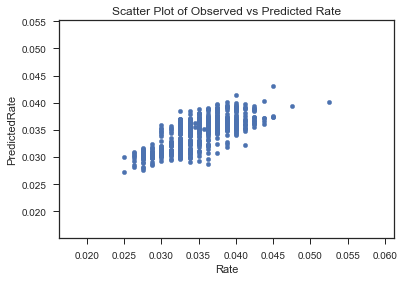

In [338]:
test.plot(kind='scatter', x = 'Rate', y = 'PredictedRate', title = 'Scatter Plot of Observed vs Predicted Rate')


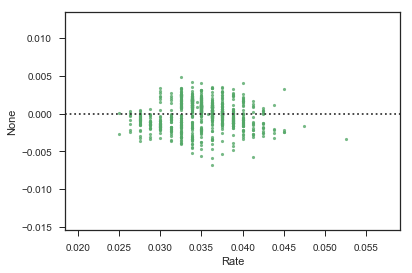

In [363]:
sns.residplot(test.Rate, y_pred, scatter_kws={"s": 10}, color = "g")

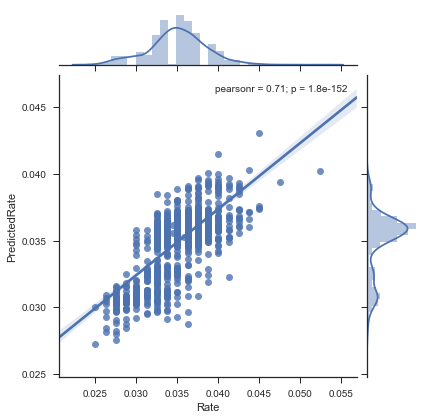

In [364]:
sns.jointplot(x="Rate", y="PredictedRate" , data=test, kind="reg")

### 5. Assessment of the performance of the model and comment of any insights about how interest rates are determined 

This model explains approximately 50.8% of the variation in the Interest Rate for mortgage.
BankName: it is very likely that this variable is included in the model because each bank in different location offers different interest rate.
It is highly likely good credit score decrease the interest rate. As in regression table, they have negative coefficient.
Log(LocMedY) also showed negative coefficient because being in a higher income area tends to decrease the interest rate.
There are three years of Mortgage Note, 2013, 2015, 2016. Because interest rate changes depending on many factors year by year, this variable is very useful in this model.
If the mortgage has federal guarantee, it would produce less interest rate as shown in Exhibit 2.
Therefore, we can conclude that kind of the bank (location of bank), location of borrowers, year of the mortgage, federal guarantee, and borrower’s credit score, loan amount, lending risk (UPB, LTV) play important roles in deciding interest rate.